In [7]:
import pandas as pd

In [8]:
import numpy as np
import seaborn as sns


In [9]:
df=sns.load_dataset("titanic")

In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [12]:
df.duplicated().sum()

107

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
#treating null values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,106
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [16]:
df["age"].fillna(df["age"].mean(),inplace=True)

<ipython-input-16-d19ffe4f52c2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].mean(),inplace=True)


In [17]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [18]:
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

<ipython-input-19-f1ae75c5e9c5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)


In [20]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [22]:
df.drop(['deck','embark_town'],axis=1,inplace=True)

In [23]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [24]:
#Now remove unnecessary columns


In [25]:
df.drop(['alive',"who"],axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    784 non-null    int64   
 1   pclass      784 non-null    int64   
 2   sex         784 non-null    object  
 3   age         784 non-null    float64 
 4   sibsp       784 non-null    int64   
 5   parch       784 non-null    int64   
 6   fare        784 non-null    float64 
 7   embarked    784 non-null    object  
 8   class       784 non-null    category
 9   adult_male  784 non-null    bool    
 10  alone       784 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


In [27]:
#Now we have to convert each categorical value into numerical value for classification
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

columns=["sex","embarked","class","adult_male","alone"]

for  cols in columns:
  df[cols]=le.fit_transform(df[cols])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    784 non-null    int64  
 1   pclass      784 non-null    int64  
 2   sex         784 non-null    int64  
 3   age         784 non-null    float64
 4   sibsp       784 non-null    int64  
 5   parch       784 non-null    int64  
 6   fare        784 non-null    float64
 7   embarked    784 non-null    int64  
 8   class       784 non-null    int64  
 9   adult_male  784 non-null    int64  
 10  alone       784 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 73.5 KB


In [29]:
#Now seperate target and feature variables

X=df.drop(["survived"],axis=1)
y=df["survived"]

<Axes: >

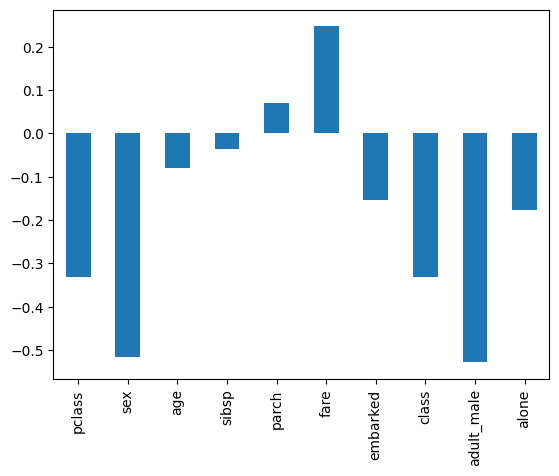

In [30]:
#Now to see how each feature is correlated to the target
correlation=X.corrwith(y)
correlation.plot(kind="bar")


In [31]:
#Here age,sibsp,parch and embarked are less related to survived

X.drop(["age","sibsp","parch","embarked"],axis=1,inplace=True)

<Axes: >

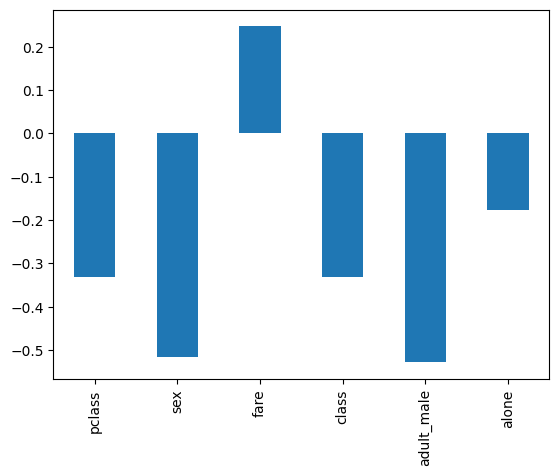

In [32]:
correlation2=X.corrwith(y)
correlation2.plot(kind="bar")

In [33]:
#Now all the unnecessary attributes have been eliminated
#Start spliting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
#We will check the performance of the data using various  classification algorithms

#Logistic Regression:
#It helps to classify groups into yes or no
#The model looks at various features and assigns weights on how important each feature is
#It combines the scores of various features together calculate a score using sigmoid function
#The result is between 0 and 1 ,if probability greater than 0.5 "yes",else " no"
#Logistic Regression works best when the classes are separable by a straight line
#Best for linearly seperable data

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
le=LogisticRegression()

In [37]:
le.fit(X_train,y_train)

LogisticRegression()

In [38]:
result_le=le.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
print(accuracy_score(y_test,result_le))

0.7898089171974523


In [41]:
#SVC
#There are many lines present to classify one feature of element to other
#Svc helps to clasify the features by using the best line possible to seperate
#It ensures maximum distance(margin) between the 2 features
#The datapoints that fall on this margin are called support vectors
#mainly used when the size of data is small
#If suppose the point is not seperable by line it maps it in to a higher dimension where it is seperable by using kernel trick
#KERNEL CAN EITHER BE POLYNOMIAL,
#                     RADIALB BASIS FUNCTION,
#                     LINEAR OR
#                     SIGMOID
#suppose if the data is seperable by staright line the kernel trick helps to bend the line in a way so that the data is seperated
#used for complex data(Face recognition,Handwriting detection)etc


In [42]:
from sklearn.svm import SVC

In [43]:
sv=SVC(kernel="linear")

In [44]:
sv.fit(X_train,y_train)

SVC(kernel='linear')

In [45]:
svc_result=sv.predict(X_test)

In [46]:
#Here i have used all the kernels and the best was linear so i choose kernel as linear
print(accuracy_score(y_test,svc_result))

0.7770700636942676


In [47]:
#Random Forest
#It tskes the decsion on the basis of multiple decision trees
#Suppose a dataset is of 100 rows and 5 featues
#The random forest makes the data split into random samples and works on it
#Each sample has its own decision tree
#The decsion tree predicts the output(yes or no)
#The random forest considers the answer that was predicted by most of the decision trees
#Mostly works on large dataset
# used when the ouput of the target depends on multiple features
#parameter
#n_estimators	      Number of trees in the forest	More trees → Better accuracy (but slower)
#max_depth	        Maximum depth of each tree	Deeper trees → More complex patterns (but risk overfitting)
#min_samples_split	Minimum samples needed to split a node	Larger values → Prevent overfitting
#min_samples_leaf	  Minimum samples required in a leaf node	Higher value → Simpler model
#max_features	      Number of features used per tree	Lower value → More randomness (better generalization)
#bootstrap	        Whether to use bootstrapping (sampling with replacement)	True → Each tree gets random data


In [48]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc=RandomForestClassifier(n_estimators=2)

In [62]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2)

In [63]:
rfc_result=rfc.predict(X_test)

In [64]:
print(accuracy_score(y_test,rfc_result))

0.7770700636942676


In [65]:
#Decision tree Classification
#It takes the whole dataset and splits it according to the features
#The splits the data by checkimg the information gain and entropy of feature
#It checks which feature splits the data best and makes decision
#The splits are don until it reaches max depth


In [66]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dtc=DecisionTreeClassifier(max_depth=10)

In [82]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [83]:
dtc_result=dtc.predict(X_test)

In [84]:
print(accuracy_score(y_test,dtc_result))

0.7579617834394905


In [85]:
#KNN
#It does not train a model but memorizes the data and makes prediction on the basis of it
#If we have a new data point to classify
#It calculates the eucledian distance between the point to the stored points
#It sorts THE DATPOINTS according to the distance
#It Chooses the nearest k point and assigns to it
#According to the distance it assign it to the the most common class(ie THE CLASS WITH THE MOST NUMBER OF OCCURENCE NOT THE ONE WITH MOST DATAPOINTS)
#WE can add the parameter of the number of neighbours or k

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knc=KNeighborsClassifier(n_neighbors=10)

In [103]:
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [104]:
knc_result=knc.predict(X_test)

In [105]:
print(accuracy_score(y_test,knc_result))

0.7452229299363057


In [106]:
#Naive Bayers
#We use naive bayes classification when the featueres are independent of each other
#Used for small datasets
#It calculates the probability of the target using bayes theorem
#it works on conditional probability
#It predicts the the person survived or not by taking in mind the various features['fare','age']etc

In [107]:
from sklearn.naive_bayes import GaussianNB

In [108]:
nb=GaussianNB()

In [110]:
nb.fit(X_train,y_train)

GaussianNB()

In [111]:
nb_result=nb.predict(X_test)

In [114]:
print(accuracy_score(y_test,nb_result))

0.7770700636942676
